# **1. Perkenalan Dataset**


Dataset yang akan digunakan untuk proyek ini adalah Bank Customer Attrition Insights, yang tersedia di Kaggle. Dataset ini terdiri dari berbagai informasi pelanggan bank yang mencakup karakteristik demografi, keuangan, dan perilaku. Setiap baris dalam dataset merepresentasikan satu pelanggan, dan kolom-kolomnya menyediakan wawasan tentang berbagai aspek yang berpotensi memengaruhi keputusan pelanggan untuk tetap menggunakan layanan bank atau tidak.

Beberapa kolom kunci dalam dataset ini meliputi:

- RowNumber, CustomerId, Surname: Identifikasi unik untuk setiap entri dan pelanggan.
- CreditScore: Skor kredit pelanggan, yang dapat memengaruhi keputusan churn.
- Geography, Gender, Age, Tenure: Data demografi dan durasi pelanggan menggunakan layanan bank.
- Balance, NumOfProducts, HasCrCard, IsActiveMember, EstimatedSalary: Informasi finansial dan keterlibatan pelanggan dengan bank.
- Complain, Satisfaction Score, Card Type, Points Earned: Data terkait pengalaman dan kepuasan pelanggan.

Kolom Exited adalah target utama dalam proyek ini. Kolom ini merupakan variabel biner (1 jika pelanggan telah churn, 0 jika tidak) yang akan kita prediksi. 

**Sumber dataset:** [Bank Customer Attrition Insights](https://www.kaggle.com/datasets/marusagar/bank-customer-attrition-insights)


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning atau deep learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

Jika dataset berupa unstructured data, silakan sesuaikan dengan format seperti kelas Machine Learning Pengembangan atau Machine Learning Terapan

In [2]:
df = pd.read_csv('../Bank-Customer-Attrition_preprocessing.csv')

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
0,1,15598695,Fields,619,France,Female,42,2,0.00,1,1,1,101348.88,1,1,2,DIAMOND,464
1,2,15649354,Johnston,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0,1,3,DIAMOND,456
2,3,15737556,Vasilyev,502,France,Female,42,8,159660.80,3,1,0,113931.57,1,1,3,DIAMOND,377
3,4,15671610,Hooper,699,France,Female,39,1,0.00,2,0,0,93826.63,0,0,5,GOLD,350
4,5,15625092,Colombo,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0,0,5,GOLD,425


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   RowNumber           10000 non-null  int64  
 1   CustomerId          10000 non-null  int64  
 2   Surname             10000 non-null  object 
 3   CreditScore         10000 non-null  int64  
 4   Geography           10000 non-null  object 
 5   Gender              10000 non-null  object 
 6   Age                 10000 non-null  int64  
 7   Tenure              10000 non-null  int64  
 8   Balance             10000 non-null  float64
 9   NumOfProducts       10000 non-null  int64  
 10  HasCrCard           10000 non-null  int64  
 11  IsActiveMember      10000 non-null  int64  
 12  EstimatedSalary     10000 non-null  float64
 13  Exited              10000 non-null  int64  
 14  Complain            10000 non-null  int64  
 15  Satisfaction Score  10000 non-null  int64  
 16  Card 

In [5]:
df.describe(include='all')

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Card Type,Point Earned
count,10000.00000,1.000000e+04,10000,10000.000000,10000,10000,10000.000000,10000.000000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000,10000.000000
unique,NaN,NaN,2932,NaN,3,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4,NaN
top,NaN,NaN,Smith,NaN,France,Male,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DIAMOND,NaN
freq,NaN,NaN,32,NaN,5014,5457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2507,NaN
mean,5000.50000,1.569094e+07,NaN,650.528800,NaN,NaN,38.921800,5.012800,76485.889288,1.530200,0.70550,0.515100,100090.239881,0.203800,0.204400,3.013800,NaN,606.515100
std,2886.89568,7.193619e+04,NaN,96.653299,NaN,NaN,10.487806,2.892174,62397.405202,0.581654,0.45584,0.499797,57510.492818,0.402842,0.403283,1.405919,NaN,225.924839
min,1.00000,1.556570e+07,NaN,350.000000,NaN,NaN,18.000000,0.000000,0.000000,1.000000,0.00000,0.000000,11.580000,0.000000,0.000000,1.000000,NaN,119.000000
25%,2500.75000,1.562853e+07,NaN,584.000000,NaN,NaN,32.000000,3.000000,0.000000,1.000000,0.00000,0.000000,51002.110000,0.000000,0.000000,2.000000,NaN,410.000000
50%,5000.50000,1.569074e+07,NaN,652.000000,NaN,NaN,37.000000,5.000000,97198.540000,1.000000,1.00000,1.000000,100193.915000,0.000000,0.000000,3.000000,NaN,605.000000
75%,7500.25000,1.575323e+07,NaN,718.000000,NaN,NaN,44.000000,7.000000,127644.240000,2.000000,1.00000,1.000000,149388.247500,0.000000,0.000000,4.000000,NaN,801.000000


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

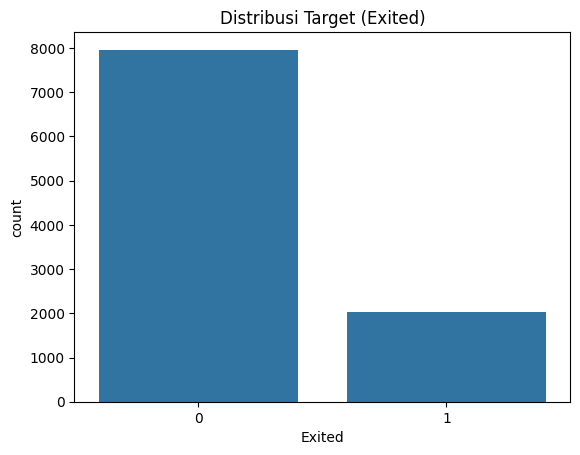

Exited
0    79.62
1    20.38
Name: proportion, dtype: float64

In [6]:
# Distribusi target
sns.countplot(x='Exited', data=df)
plt.title('Distribusi Target (Exited)')
plt.show()

df['Exited'].value_counts(normalize=True) * 100

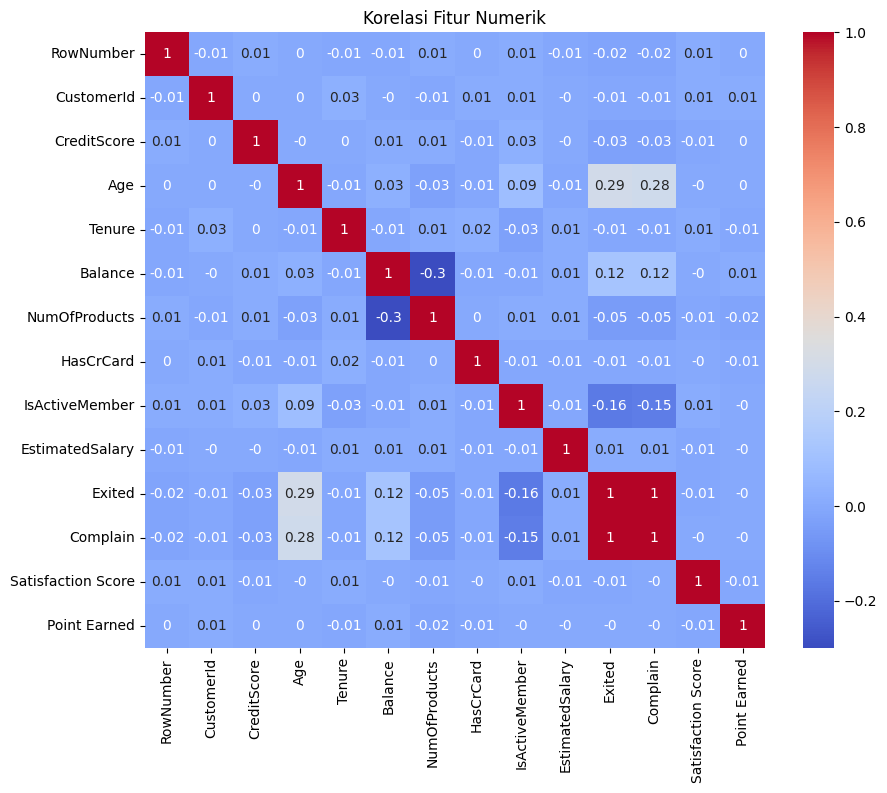

In [7]:
# Korelasi antar fitur numerik

# Ambil hanya kolom numerik
numerik_df = df.select_dtypes(include='number').corr().round(2)

plt.figure(figsize=(10,8))
sns.heatmap(data = numerik_df, annot=True, cmap='coolwarm')
plt.title('Korelasi Fitur Numerik')
plt.show()

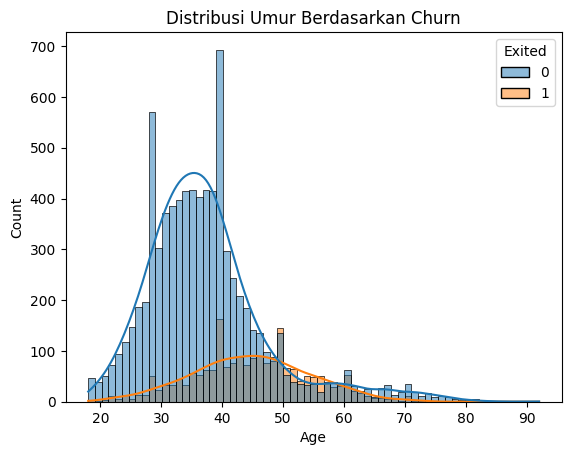

In [8]:
# Distribusi usia dan churn
sns.histplot(data=df, x='Age', hue='Exited', kde=True)
plt.title('Distribusi Umur Berdasarkan Churn')
plt.show()

# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning.

Jika Anda menggunakan data teks, data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang bisa dilakukan, tetapi **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

Cukup sesuaikan dengan karakteristik data yang kamu gunakan yah. Khususnya ketika kami menggunakan data tidak terstruktur.

In [9]:
df.isnull().sum()

RowNumber             0
CustomerId            0
Surname               0
CreditScore           0
Geography             0
Gender                0
Age                   0
Tenure                0
Balance               0
NumOfProducts         0
HasCrCard             0
IsActiveMember        0
EstimatedSalary       0
Exited                0
Complain              0
Satisfaction Score    0
Card Type             0
Point Earned          0
dtype: int64

In [10]:
# Jika ada data yang kosong
clean_df = df.copy()
clean_df = clean_df.dropna()

In [11]:
print('Jumlah baris duplikat: ', clean_df.duplicated().sum())

Jumlah baris duplikat:  0


In [12]:
# Jika ada baris yang duplikat
clean_df = clean_df.drop_duplicates()

In [13]:
# Menghapus kolom RowNumber, CustomerId, Surname karena bernilai unik dan tidak digunakan dalam pemodelan
clean_df.drop(columns=['RowNumber', 'CustomerId', 'Surname'], inplace=True)

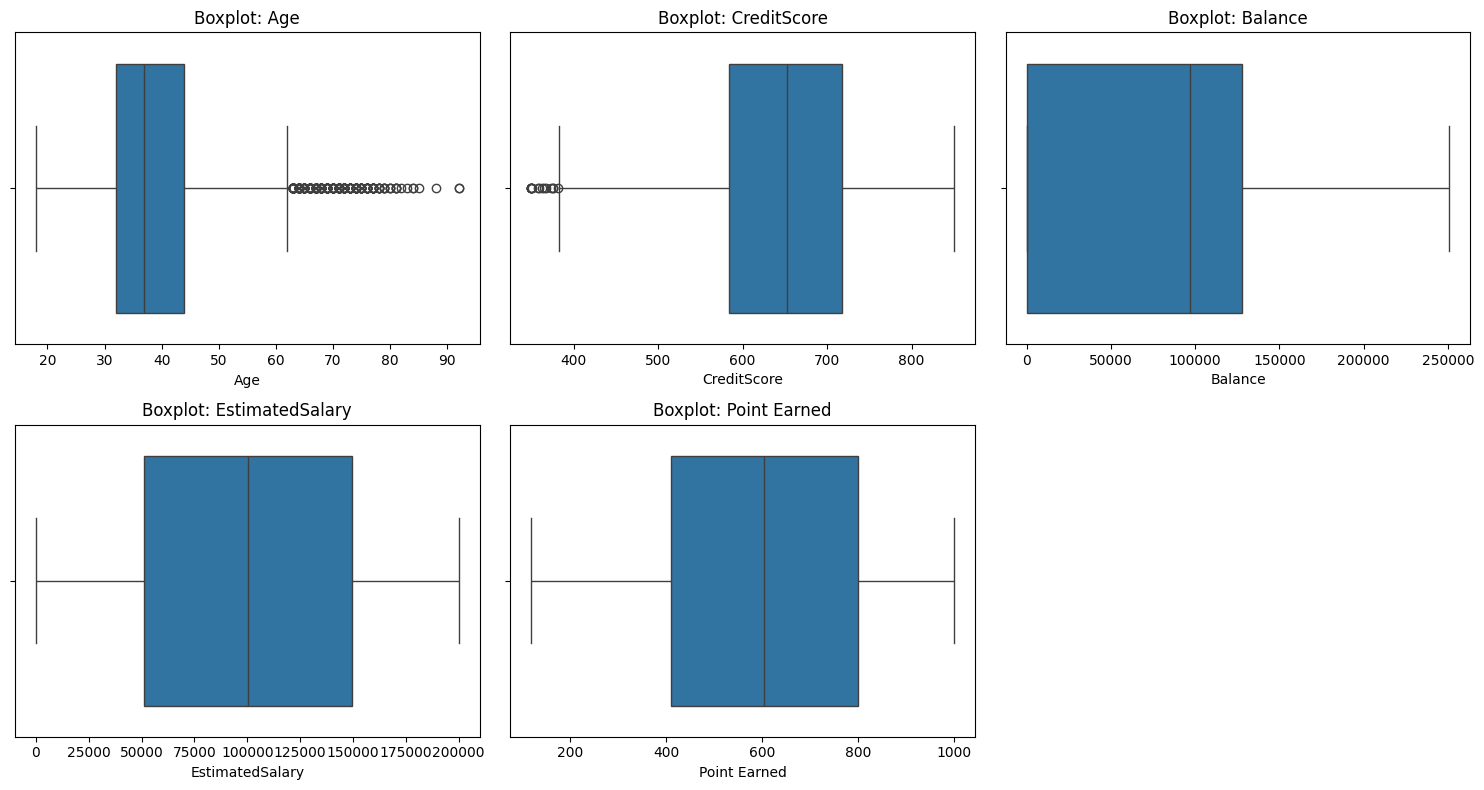

In [14]:
# Boxplot untuk fitur numerik
num_cols = ['Age', 'CreditScore', 'Balance', 'EstimatedSalary', 'Point Earned']
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=clean_df[col])
    plt.title(f'Boxplot: {col}')
plt.tight_layout()
plt.show()

In [15]:
# Deteksi dan penanganan outlier dengan IQR
def remove_outliers_iqr(df, cols):
    for col in cols:
        Q1 = df[col].quantile(0.25)
        Q3 = df[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        before = df.shape[0]
        df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]
        after = df.shape[0]
        print(f"{col}: Removed {before - after} outliers.")
    return df

# Terapkan fungsi
clean_df = remove_outliers_iqr(clean_df, num_cols)

Age: Removed 359 outliers.
CreditScore: Removed 14 outliers.
Balance: Removed 0 outliers.
EstimatedSalary: Removed 0 outliers.
Point Earned: Removed 0 outliers.


In [18]:
# One-Hot Encoding untuk kolom kategorik
clean_df = pd.get_dummies(clean_df, columns=['Gender', 'Geography', 'Card Type'], drop_first=True)

In [19]:
# Scaling fitur kontinu
scaler = StandardScaler()
clean_df[num_cols] = scaler.fit_transform(clean_df[num_cols])

In [20]:
clean_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Complain,Satisfaction Score,Point Earned,Gender_Male,Geography_Germany,Geography_Spain,Card Type_GOLD,Card Type_PLATINUM,Card Type_SILVER
0,-0.329901,0.479327,2,-1.226614,1,1,1,0.021336,1,1,2,-0.627579,False,False,False,False,False,False
1,-0.444342,0.365664,1,0.116511,1,0,1,0.215937,0,1,3,-0.662991,False,False,True,False,False,False
2,-1.547136,0.479327,8,1.332148,3,1,0,0.240084,1,1,3,-1.012686,False,False,False,False,False,False
3,0.502395,0.138339,1,-1.226614,2,0,0,-0.109438,0,0,5,-1.132202,False,False,False,True,False,False
4,2.073356,0.592990,2,0.784853,1,1,1,-0.365734,0,0,5,-0.800213,False,False,True,True,False,False


In [21]:
# Memisahkan fitur dan target
X = clean_df.drop('Exited', axis=1)
y = clean_df['Exited']